In [8]:
!pip install -q tensorflow==2.15.0
!pip install -q protobuf==3.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 72.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 4.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 4.25.8 which is incompatible.
s3fs 2025.3.0 requires fsspec==2025.3.0.*, but y

In [11]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import random
import os
import zipfile

In [12]:


base = "/kaggle/input/dogs-vs-cats-redux-kernels-edition"
print("📂 Contenu du dossier de base :", os.listdir(base))

train_zip = os.path.join(base, "train.zip")
test_zip = os.path.join(base, "test.zip")

train_extract_path = "/kaggle/working/train"
test_extract_path = "/kaggle/working/test"

# Décompression train.zip
if not os.path.exists(train_extract_path) or len(os.listdir(train_extract_path)) == 0:
    print("📦 Extraction de train.zip...")
    with zipfile.ZipFile(train_zip, 'r') as zip_ref:
        zip_ref.extractall(train_extract_path)
    print("✅ train.zip décompressé avec succès")

# Décompression test.zip
if not os.path.exists(test_extract_path) or len(os.listdir(test_extract_path)) == 0:
    print("📦 Extraction de test.zip...")
    with zipfile.ZipFile(test_zip, 'r') as zip_ref:
        zip_ref.extractall(test_extract_path)
    print("✅ test.zip décompressé avec succès")

# 🔍 Vérifie la vraie structure du dossier
print("\n📁 Contenu de /kaggle/working/train :", os.listdir(train_extract_path))
print("📁 Contenu de /kaggle/working/test :", os.listdir(test_extract_path))

# 📸 Corrige le chemin s’il y a un sous-dossier "train" à l’intérieur
if "train" in os.listdir(train_extract_path):
    train_dir = os.path.join(train_extract_path, "train")
else:
    train_dir = train_extract_path

if "test" in os.listdir(test_extract_path):
    test_dir = os.path.join(test_extract_path, "test")
else:
    test_dir = test_extract_path

# Vérification finale
print("\n📸 Exemples de fichiers dans train :", os.listdir(train_dir)[:10])
print("📸 Exemples de fichiers dans test :", os.listdir(test_dir)[:10])


📂 Contenu du dossier de base : ['sample_submission.csv', 'train.zip', 'test.zip']

📁 Contenu de /kaggle/working/train : ['train']
📁 Contenu de /kaggle/working/test : ['test']

📸 Exemples de fichiers dans train : ['dog.8997.jpg', 'cat.6553.jpg', 'cat.11111.jpg', 'dog.5238.jpg', 'cat.11621.jpg', 'dog.10095.jpg', 'dog.8785.jpg', 'dog.1992.jpg', 'cat.6737.jpg', 'cat.2463.jpg']
📸 Exemples de fichiers dans test : ['7969.jpg', '4447.jpg', '7315.jpg', '11430.jpg', '2308.jpg', '11809.jpg', '2052.jpg', '4888.jpg', '3064.jpg', '768.jpg']


In [13]:
noms_fichiers = os.listdir(train_dir)
noms_fichiers

['dog.8997.jpg',
 'cat.6553.jpg',
 'cat.11111.jpg',
 'dog.5238.jpg',
 'cat.11621.jpg',
 'dog.10095.jpg',
 'dog.8785.jpg',
 'dog.1992.jpg',
 'cat.6737.jpg',
 'cat.2463.jpg',
 'cat.1036.jpg',
 'dog.5337.jpg',
 'cat.5067.jpg',
 'cat.6203.jpg',
 'cat.10064.jpg',
 'cat.7390.jpg',
 'dog.5331.jpg',
 'dog.791.jpg',
 'cat.5081.jpg',
 'cat.5537.jpg',
 'cat.10645.jpg',
 'dog.5958.jpg',
 'dog.2202.jpg',
 'dog.3149.jpg',
 'cat.6673.jpg',
 'dog.532.jpg',
 'cat.2417.jpg',
 'dog.2175.jpg',
 'cat.7819.jpg',
 'dog.11320.jpg',
 'dog.12153.jpg',
 'cat.2648.jpg',
 'dog.12394.jpg',
 'cat.6517.jpg',
 'cat.2593.jpg',
 'dog.8770.jpg',
 'dog.880.jpg',
 'cat.8570.jpg',
 'cat.1011.jpg',
 'cat.4899.jpg',
 'dog.2524.jpg',
 'cat.9615.jpg',
 'cat.5988.jpg',
 'cat.879.jpg',
 'dog.10359.jpg',
 'cat.4858.jpg',
 'cat.5115.jpg',
 'cat.3772.jpg',
 'dog.2594.jpg',
 'dog.1903.jpg',
 'cat.10080.jpg',
 'cat.3180.jpg',
 'dog.5720.jpg',
 'dog.9470.jpg',
 'dog.10443.jpg',
 'dog.7258.jpg',
 'cat.1551.jpg',
 'dog.3095.jpg',
 'cat.1

In [14]:
# Initialiser une liste pour les catégories
categories = []

# Boucle pour assigner les catégories
for filename in noms_fichiers:
    # Obtenir la partie avant le premier point du nom de fichier
    categorie = filename.split('.')[0]
    # Vérifier si cette partie est "dog"
    if categorie == 'dog':
        # Ajouter 1 à la liste categories (indiquant que c'est une image de chien)
        categories.append(1)
    else:
        # Ajouter 0 à la liste categories (indiquant que c'est une image de chat)
        categories.append(0)

In [15]:
categories

[1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,


In [16]:
# creer un dataframe avec pandas

df = pd.DataFrame ({
    'filename': noms_fichiers,
    'categorie': categories
})

# Afficher le dataframe
print(df.head())

        filename  categorie
0   dog.8997.jpg          1
1   cat.6553.jpg          0
2  cat.11111.jpg          0
3   dog.5238.jpg          1
4  cat.11621.jpg          0


In [17]:
compte_categories = df["categorie"].value_counts()
noms_categories = ["chien", "chat"]
compte_categories

categorie
1    12500
0    12500
Name: count, dtype: int64

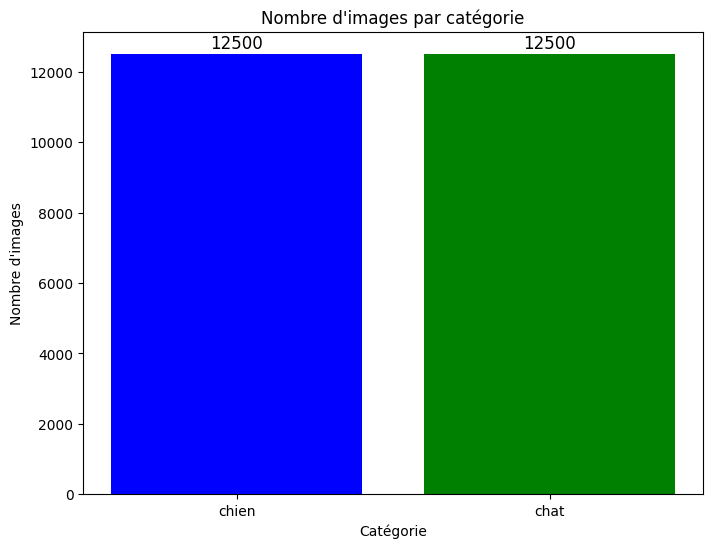

In [18]:
plt.figure(figsize=(8, 6))
couleurs = ['blue', 'green']  # Couleurs compréhensibles
plt.bar(noms_categories, compte_categories, color=couleurs)
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'images')
plt.title('Nombre d\'images par catégorie')
for i, v in enumerate(compte_categories):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=12, color='black')

In [19]:
# Sélectionner une image aléatoire
# Sélectionner une image aléatoire
image_aleatoire = random.choice(noms_fichiers)


# Chemin complet de l'image sélectionnée
img_path = os.path.join(train_dir, image_aleatoire)
img_path

'/kaggle/working/train/train/dog.7476.jpg'

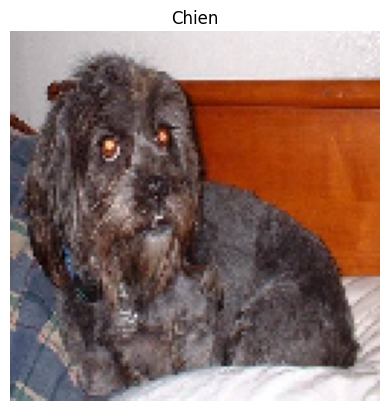

In [20]:
# Charger et afficher l'image
img = image.load_img(img_path, target_size=(128, 128))
plt.imshow(img)
categorie = 'Chien' if 'dog' in image_aleatoire else 'Chat'
plt.title(categorie)
plt.axis('off')
plt.show()

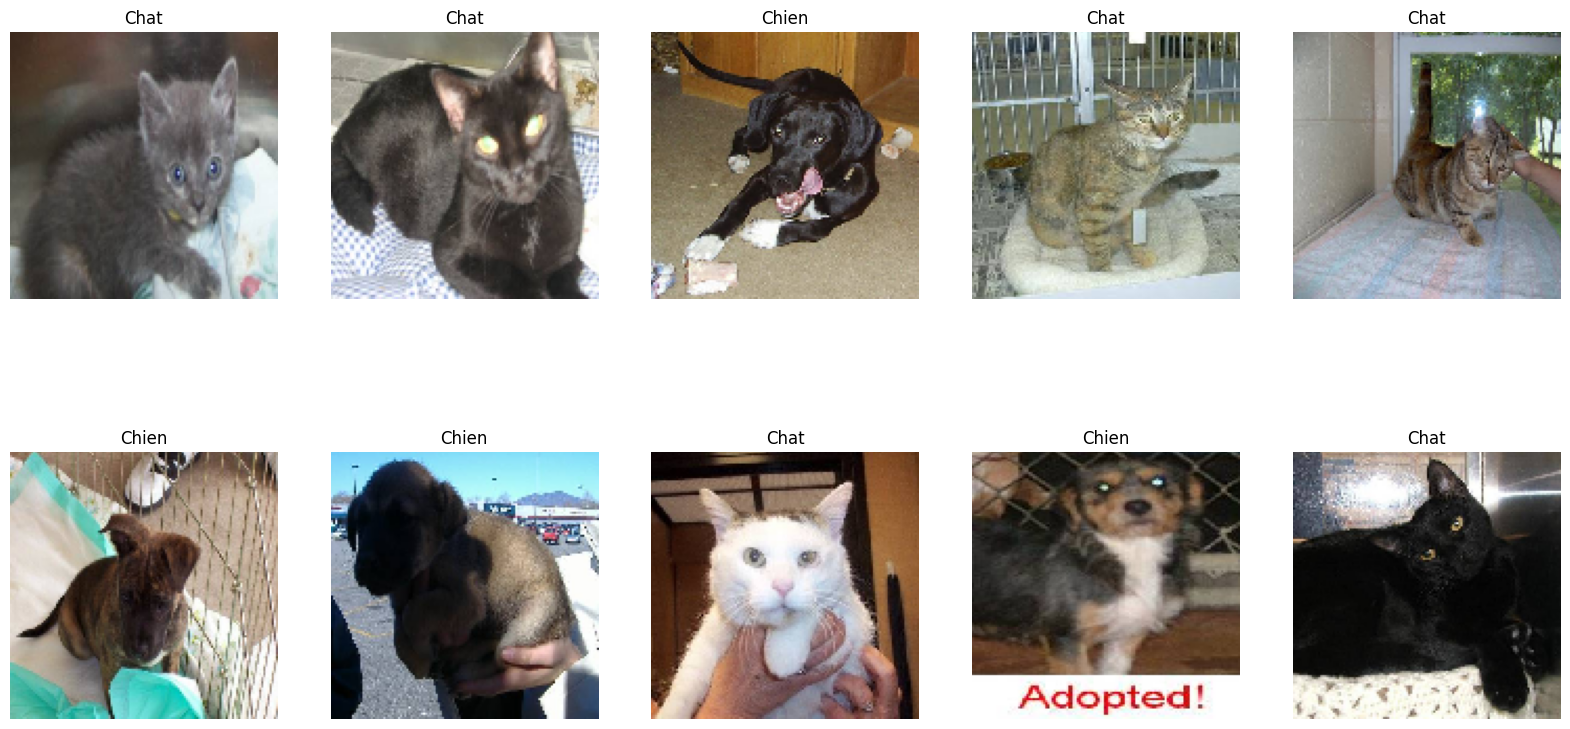

In [21]:
# Sélectionner 10 images aléatoires
random_images = df.sample(n=10)

# Afficher les 10 images aléatoires
plt.figure(figsize=(20, 10))

for i, row in enumerate(random_images.iterrows()):
    filename = row[1]['filename']
    category = 'Chien' if row[1]['categorie'] == 1 else 'Chat'
    img_path = os.path.join(train_dir, filename)
    img = image.load_img(img_path, target_size=(128, 128))
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis('off')

plt.show()